# Imports

In [1]:
import pandas as pd, seaborn as sns, numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import sklearn.metrics as metrics

# Load & Review Dataset

In [2]:
df = pd.read_csv("taxicab_ready.csv")
df.head()

,trip_distance,jfk_trip,subtotal
0,3.34,0,13.8
1,1.80,0,16.8
2,1.00,0,7.3
3,3.70,0,21.3
4,4.37,0,17.8


<Figure size 400x400 with 0 Axes>

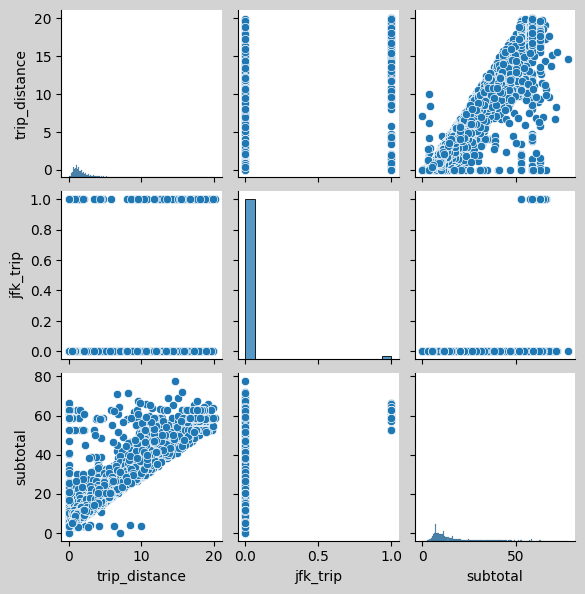

In [3]:
plt.figure(figsize=(4, 4))
sns.pairplot(df, height=2, aspect=1)
plt.gcf().set_facecolor('lightgrey')
plt.show();

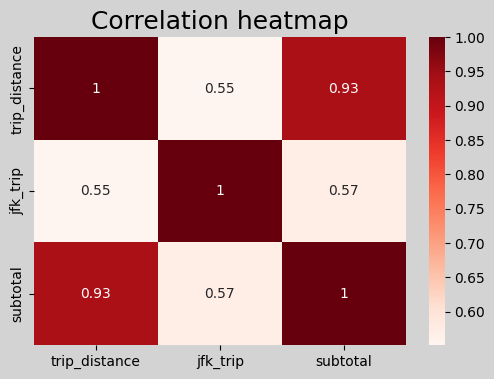

In [4]:
plt.figure(figsize=(6,4))
plt.gcf().set_facecolor('lightgrey')
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap', fontsize=18)
plt.show()

The final features we have has been very underwhelming, however if these are the only features that are relevant predictors, then these are all that we can use. Nearly all other quirks found within other features were explained by trip distance. It certainly seems logical that the distance of the trip booked would be the main predictor however it is disappointing we were unable to find more useful quirks in the dataset that would allow for a more interesting model.

That being said let's make a linear regression model with our two predictor variables. First we need to seperate out the independent or x variables from the dependant or y variable. Then we need to split the data into train and test portions, we will do an 80/20 split of the data where 80% is used to train and 20% is used to test.

In [5]:
x_independant = df.drop(columns="subtotal")
y_dependant = df["subtotal"]

X_train, X_test, y_train, y_test = train_test_split(x_independant, y_dependant, test_size=0.20, random_state=0)

In [6]:
x_independant.head()

,trip_distance,jfk_trip
0,3.34,0
1,1.80,0
2,1.00,0
3,3.70,0
4,4.37,0


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Let's get some metrics to gauge how well our model is performing on the test data.

In [8]:
y_pred_test = model.predict(X_test)
print('Test R Squared:', round(r2_score(y_test, y_pred_test), 3))
print('Test Mean Absolute Error:', round(mean_absolute_error(y_test, y_pred_test),3))
print('Test Mean Squared Error:', round(mean_squared_error(y_test, y_pred_test),3))
print('Test Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3))
print(f"\nModel Coefficients: {model.coef_}")

Test R Squared: 0.866
Test Mean Absolute Error: 2.138
Test Mean Squared Error: 15.077
Test Root Mean Squared Error: 3.883

Model Coefficients: [2.87341954 6.72712923]


We have a very good test R squared of 0.866, which means nearly 87% of the variance within subtotal is explained by our two features. Our mean errors are also pretty good, our mean absolute error is 2.138, meaning on average our predictions are only $2.138 off of the actual value of the trip. We have variables coefficients of 2.87 and 6.72. The 2.87 means that for every mile the trip is, it will be $2.87 dollars more expensive. Similarly, on average a trip will be $6.72 dollars more expensive if you are going to JFK (but of course we know in reality it is a flat $52.00 fee)

Now let's look at a visualization of how accurate our predictions are.

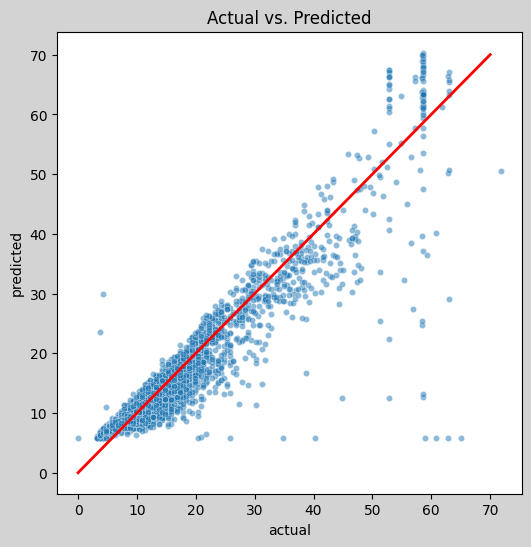

In [9]:
results = pd.DataFrame(data={'actual': y_test, 'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']

fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.gcf().set_facecolor('lightgrey')
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,70], [0,70], c='red', linewidth=2)
plt.title('Actual vs. Predicted')
plt.show();

If an absolutely perfect model is described mathematically as predicted values being exactly equal to the actual values then the red line in the graph above is a visualization of what our model is striving towards, and the further away all of our data points are from the red line, then the worse that our model is performing. Luckily for us our model seems to be performing quite well even in this visualization. It should be noted that the the anomalies in the right side of the graph, the straight lines that are forming, are due to the outlier bound we set for fare_amount and the flat fee for trips to JFK.

Let's do a check for homoscedasticity, which is a test for constant variance. If the residuals of a model are not eveny distributed, then it can be assumed that the model is not generating responses that can be valid for statistcial inference.

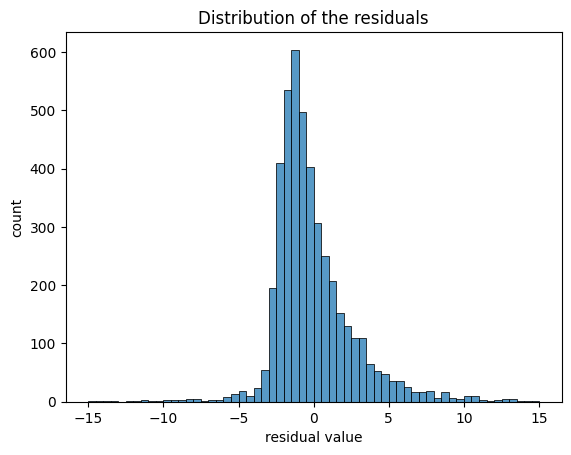

In [10]:
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

Our residuals are evenly distributed around (nearly) zero, perfect! This suggests that our model could be put into use with faith that it's predictions will be accurate and meaningful.